In [1]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
data = pd.read_excel('D:/ƒê·ªì √°n 2 Th·∫ßy Tr·ªã/ƒê·ªì √Ån 2/weatherbit_hanoi_2024.xlsx')

In [3]:
data

M·ªëc th·ªùi gian  M·ª©c ƒë·ªô m√¢y che ph·ªß  ƒêi·ªÉm s∆∞∆°ng  \
0      2023-12-31                  79        18.9   
1      2024-01-01                  59        18.1   
2      2024-01-02                  77        19.6   
3      2024-01-03                  80        15.4   
4      2024-01-04                 100        14.0   
..            ...                 ...         ...   
360    2024-12-26                  92        14.3   
361    2024-12-27                 100        13.6   
362    2024-12-28                  65        11.0   
363    2024-12-29                  39        11.8   
364    2024-12-30                  85        13.8   

     B·ª©c x·∫° khu·∫øch t√°n ngang(DHI)  B·ª©c x·∫° tr·ª±c ti·∫øp b√¨nh th∆∞·ªùng(DNI)  \
0                              40                                329   
1                              40                                329   
2                              40                                329   
3                              40                                329   
4                              40                                330   
..                            ...                                ...   
360                            40                                327   
361                            40                                328   
362                            40                                328   
363                            40                                328   
364                            40                                328   

     B·ª©c x·∫° m·∫∑t tr·ªùi to√†n ph·∫ßn ngang(GHI)  max_dhi  max_dni  max_ghi  \
0                                     207      116      911      764   
1                                     207      116      912      764   
2                                     208      116      912      765   
3                                     208      116      912      767   
4                                     209      116      913      768   
..                                    ...      ...      ...      ...   
360                                   206      116      910      759   
361                                   206      116      910      760   
362                                   206      116      910      761   
363                                   207      116      911      762   
364                                   207      116      911      763   

     B·ª©c x·∫° m·∫∑t tr·ªùi t·ªïng  ...  T·ªëc ƒë·ªô gi√≥ gi·∫≠t  T·ªëc ƒë·ªô gi√≥ trung b√¨nh  \
0                      78  ...              3.6                    0.9   
1                     189  ...              7.6                    1.6   
2                     149  ...              7.4                    1.4   
3                      50  ...             10.4                    1.8   
4                      69  ...              6.0                    1.4   
..                    ...  ...              ...                    ...   
360                   111  ...              6.4                    1.4   
361                    52  ...              7.6                    2.2   
362                   174  ...              8.0                    2.2   
363                   207  ...              6.8                    1.7   
364                    55  ...              5.6                    1.0   

     L∆∞·ª£ng m∆∞a ghi nh·∫≠n  L∆∞·ª£ng m∆∞a t·ª´ ngu·ªìn v·ªá tinh GPM  √Åp su·∫•t kh√¥ng kh√≠  \
0                   0.0                             0.0               1016   
1                   0.0                             0.0               1015   
2                   0.0                             0.0               1015   
3                   0.0                             0.0               1018   
4                   0.0                             0.0               1018   
..                  ...                             ...                ...   
360                 0.0                             0.0               1021   
361                 0.0        

In [4]:
dscr = data.describe()
dscr

M·ªëc th·ªùi gian  M·ª©c ƒë·ªô m√¢y che ph·ªß  ƒêi·ªÉm s∆∞∆°ng  \
count                            365          365.000000  365.000000   
mean   2024-06-30 22:05:35.342465792           70.284932   21.291233   
min              2023-12-31 00:00:00            0.000000    3.300000   
25%              2024-04-01 00:00:00           56.000000   18.200000   
50%              2024-07-01 00:00:00           75.000000   23.300000   
75%              2024-09-30 00:00:00           90.000000   25.800000   
max              2024-12-30 00:00:00          100.000000   28.300000   
std                              NaN           24.795336    5.539457   

       B·ª©c x·∫° khu·∫øch t√°n ngang(DHI)  B·ª©c x·∫° tr·ª±c ti·∫øp b√¨nh th∆∞·ªùng(DNI)  \
count                    365.000000                         365.000000   
mean                      47.484932                         378.539726   
min                       40.000000                         326.000000   
25%                       43.000000                         348.000000   
50%                       48.000000                         382.000000   
75%                       52.000000                         412.000000   
max                       53.000000                         419.000000   
std                        4.778951                          32.745551   

       B·ª©c x·∫° m·∫∑t tr·ªùi to√†n ph·∫ßn ngang(GHI)     max_dhi     max_dni  \
count                            365.000000  365.000000  365.000000   
mean                             289.800000  123.542466  935.021918   
min                              205.000000  115.000000  909.000000   
25%                              241.000000  120.000000  928.000000   
50%                              304.000000  126.000000  937.000000   
75%                              339.000000  126.000000  942.000000   
max                              346.000000  128.000000  956.000000   
std                               50.541257    4.083803   13.226869   

           max_ghi  B·ª©c x·∫° m·∫∑t tr·ªùi t·ªïng  ...  H∆∞·ªõng gi√≥ hi·ªán t·∫°i  \
count   365.000000            365.000000  ...          365.000000   
mean    955.005479            146.030137  ...          180.342466   
min     757.000000             21.000000  ...           50.000000   
25%     854.000000             75.000000  ...          140.000000   
50%    1007.000000            120.000000  ...          161.000000   
75%    1050.000000            211.000000  ...          216.000000   
max    1062.000000            337.000000  ...          348.000000   
std     109.123732             84.634519  ...           62.289738   

       T·ªëc ƒë·ªô gi√≥ gi·∫≠t  T·ªëc ƒë·ªô gi√≥ trung b√¨nh  L∆∞·ª£ng m∆∞a ghi nh·∫≠n  \
count       365.000000             365.000000          365.000000   
mean          7.273699               1.576164            6.732603   
min           2.800000               0.600000            0.000000   
25%           6.000000               1.200000            0.000000   
50%           7.200000               1.500000            0.500000   
75%           8.400000               1.800000            6.500000   
max          25.600000               5.600000          114.500000   
std           2.019144               0.511147           14.651250   

       L∆∞·ª£ng m∆∞a t·ª´ ngu·ªìn v·ªá tinh GPM  √Åp su·∫•t kh√¥ng kh√≠  ƒê·ªô ·∫©m t∆∞∆°ng ƒë·ªëi  \
count                      365.000000         365.000000       365.000000   
mean                         6.732603        1009.608219        79.364384   
min                          0.000000         992.000000        52.000000   
25%                          0.000000        1004.000000        75.000000   
50%                          0.500000        1009.000000        81.000000   
75%                          6.500000        1015.000000        85.000000   
max                        114.500000        1028.000000        95.000000   
std                         14.651250           7.099949         8.757185   

       √Åp su·∫•t 

In [5]:
# X√≥a b·ªè d·ªØ li·ªáu d∆∞ th·ª´a
xoa_dulieu = data.drop(columns=['L∆∞·ª£ng tuy·∫øt r∆°i',
                                'ƒê·ªô s√¢u tuy·∫øt t√≠ch t·ª•',
                                'Tr·∫°ng th√°i c·∫≠p nh·∫≠t d·ªØ li·ªáu'])
data = xoa_dulieu
data

M·ªëc th·ªùi gian  M·ª©c ƒë·ªô m√¢y che ph·ªß  ƒêi·ªÉm s∆∞∆°ng  \
0      2023-12-31                  79        18.9   
1      2024-01-01                  59        18.1   
2      2024-01-02                  77        19.6   
3      2024-01-03                  80        15.4   
4      2024-01-04                 100        14.0   
..            ...                 ...         ...   
360    2024-12-26                  92        14.3   
361    2024-12-27                 100        13.6   
362    2024-12-28                  65        11.0   
363    2024-12-29                  39        11.8   
364    2024-12-30                  85        13.8   

     B·ª©c x·∫° khu·∫øch t√°n ngang(DHI)  B·ª©c x·∫° tr·ª±c ti·∫øp b√¨nh th∆∞·ªùng(DNI)  \
0                              40                                329   
1                              40                                329   
2                              40                                329   
3                              40                                329   
4                              40                                330   
..                            ...                                ...   
360                            40                                327   
361                            40                                328   
362                            40                                328   
363                            40                                328   
364                            40                                328   

     B·ª©c x·∫° m·∫∑t tr·ªùi to√†n ph·∫ßn ngang(GHI)  max_dhi  max_dni  max_ghi  \
0                                     207      116      911      764   
1                                     207      116      912      764   
2                                     208      116      912      765   
3                                     208      116      912      767   
4                                     209      116      913      768   
..                                    ...      ...      ...      ...   
360                                   206      116      910      759   
361                                   206      116      910      760   
362                                   206      116      910      761   
363                                   207      116      911      762   
364                                   207      116      911      763   

     B·ª©c x·∫° m·∫∑t tr·ªùi t·ªïng  ...  H∆∞·ªõng gi√≥ t·∫°i th·ªùi ƒëi·ªÉm gi√≥ m·∫°nh nh·∫•t  \
0                      78  ...                                    155   
1                     189  ...                                    135   
2                     149  ...                                    135   
3                      50  ...                                    186   
4                      69  ...                                    197   
..                    ...  ...                                    ...   
360                   111  ...                                    233   
361                    52  ...                                    212   
362                   174  ...                                    230   
363                   207  ...                                    136   
364                    55  ...                                    295   

     Th·ªùi ƒëi·ªÉm c√≥ h∆∞·ªõng gi√≥ m·∫°nh nh·∫•t  H∆∞·ªõng gi√≥ hi·ªán t·∫°i  T·ªëc ƒë·ªô gi√≥ gi·∫≠t  \
0                          1704006000                 155              3.6   
1                          1704042000                 135              7.6   
2                          1704196800                 135              7.4   
3                          1704261600                 186             10.4   
4                          1704337200                 197              6.0   
..                                ...                 ...              ...   
360                        1735185600                 233              6.4   
361                        173525

In [6]:
typecheck = pd.DataFrame(data)
print(typecheck.dtypes)

M·ªëc th·ªùi gian                                           datetime64[ns]
M·ª©c ƒë·ªô m√¢y che ph·ªß                                               int64
ƒêi·ªÉm s∆∞∆°ng                                                     float64
B·ª©c x·∫° khu·∫øch t√°n ngang(DHI)                                     int64
B·ª©c x·∫° tr·ª±c ti·∫øp b√¨nh th∆∞·ªùng(DNI)                                int64
B·ª©c x·∫° m·∫∑t tr·ªùi to√†n ph·∫ßn ngang(GHI)                             int64
max_dhi                                                          int64
max_dni                                                          int64
max_ghi                                                          int64
B·ª©c x·∫° m·∫∑t tr·ªùi t·ªïng                                             int64
Gi√° tr·ªã d·ª± ƒëo√°n b·ª©c x·∫° khu·∫øch t√°n ngang(DHI)                     int64
Gi√° tr·ªã d·ª± ƒëo√°n b·ª©c x·∫° tr·ª±c ti·∫øp b√¨nh th∆∞·ªùng(DNI)                int64
Gi√° tr·ªã d·ª± ƒëo√°n b·ª©c x·∫° m·∫∑t tr·ªùi to√†n ph·∫ß

In [7]:
missing_value = data.isnull().sum()
print(missing_value)
print("T·ªïng s·ªë gi√° tr·ªã thi·∫øu trong dataframe l√†", missing_value.sum())

M·ªëc th·ªùi gian                                           0
M·ª©c ƒë·ªô m√¢y che ph·ªß                                      0
ƒêi·ªÉm s∆∞∆°ng                                              0
B·ª©c x·∫° khu·∫øch t√°n ngang(DHI)                            0
B·ª©c x·∫° tr·ª±c ti·∫øp b√¨nh th∆∞·ªùng(DNI)                       0
B·ª©c x·∫° m·∫∑t tr·ªùi to√†n ph·∫ßn ngang(GHI)                    0
max_dhi                                                 0
max_dni                                                 0
max_ghi                                                 0
B·ª©c x·∫° m·∫∑t tr·ªùi t·ªïng                                    0
Gi√° tr·ªã d·ª± ƒëo√°n b·ª©c x·∫° khu·∫øch t√°n ngang(DHI)            0
Gi√° tr·ªã d·ª± ƒëo√°n b·ª©c x·∫° tr·ª±c ti·∫øp b√¨nh th∆∞·ªùng(DNI)       0
Gi√° tr·ªã d·ª± ƒëo√°n b·ª©c x·∫° m·∫∑t tr·ªùi to√†n ph·∫ßn ngang(GHI)    0
Gi√° tr·ªã d·ª± ƒëo√°n b·ª©c x·∫° m·∫∑t tr·ªùi t·ªïng                    0
Nhi·ªát ƒë·ªô cao nh·∫•t                                       

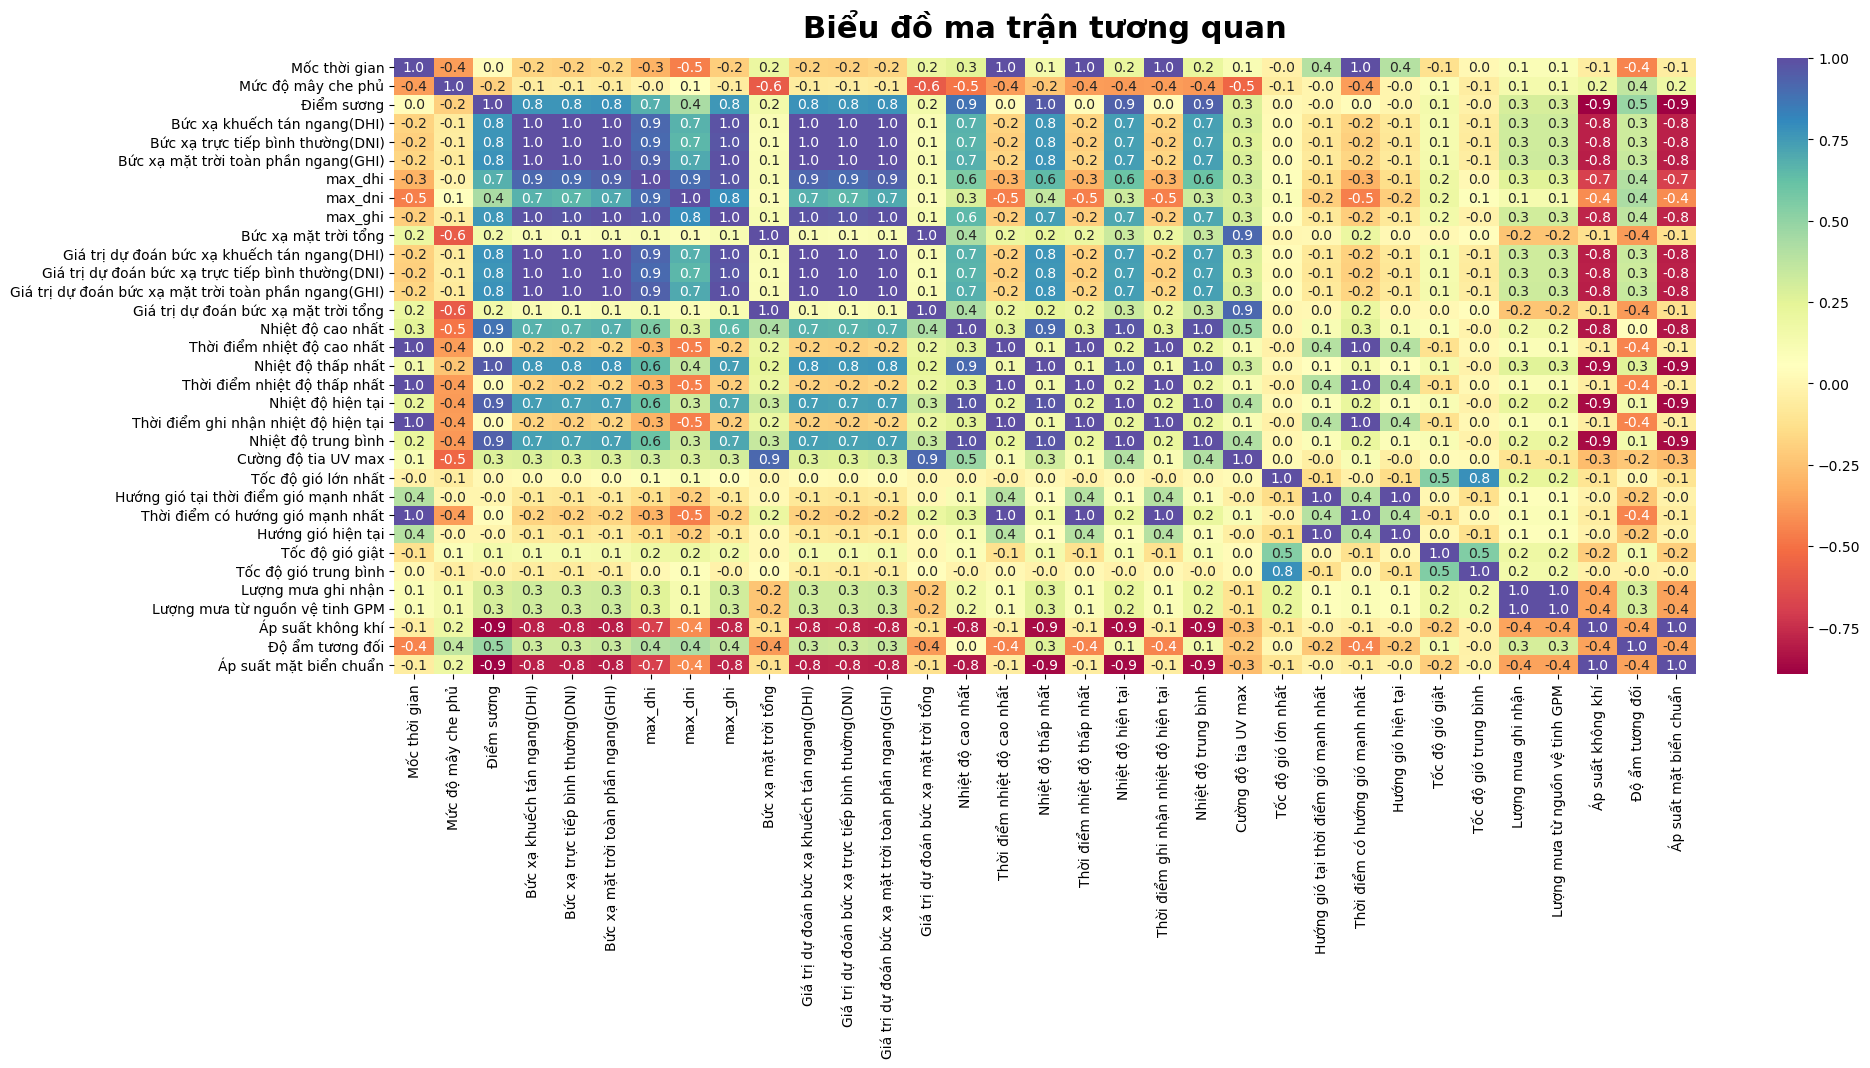

In [8]:
corre = data.corr()
plt.figure(figsize=(21, 8))
sns.heatmap(corre, annot=True, cmap='Spectral',
fmt='.1f')
plt.title('Bi·ªÉu ƒë·ªì ma tr·∫≠n t∆∞∆°ng quan', fontsize='22',
fontweight='bold', pad=15)
plt.show()

M√î H√åNH H·ªíI QUY TUY·∫æN T√çNH D·ª∞ ƒêO√ÅN NHI·ªÜT ƒê·ªò, L∆Ø·ª¢NG M∆ØA, 
ƒê·ªò ·∫®M T∆Ø∆†NG ƒê·ªêI, H∆Ø·ªöNG GI√ì, T·ªêC ƒê·ªò GI√ì GI·∫¨T, C∆Ø·ªúNG ƒê·ªò TIA UV MAX CHO NG√ÄY TI·∫æP THEO

In [9]:
# chuy·ªÉn ƒë·ªïi c·ªôt "M·ªëc th·ªùi gian" sang ki·ªÉu datetime
data["M·ªëc th·ªùi gian"] = pd.to_datetime(data["M·ªëc th·ªùi gian"], dayfirst=True, errors='coerce')

# tr√≠ch xu·∫•t bi·∫øn ƒë·ªôc l·∫≠p
features = [
    "Nhi·ªát ƒë·ªô trung b√¨nh", "ƒêi·ªÉm s∆∞∆°ng", "ƒê·ªô ·∫©m t∆∞∆°ng ƒë·ªëi", "M·ª©c ƒë·ªô m√¢y che ph·ªß", "T·ªëc ƒë·ªô gi√≥ trung b√¨nh",
    "T·ªëc ƒë·ªô gi√≥ gi·∫≠t", "H∆∞·ªõng gi√≥ hi·ªán t·∫°i", "√Åp su·∫•t kh√¥ng kh√≠", "√Åp su·∫•t m·∫∑t bi·ªÉn chu·∫©n",
    "B·ª©c x·∫° m·∫∑t tr·ªùi to√†n ph·∫ßn ngang(GHI)", "L∆∞·ª£ng m∆∞a ghi nh·∫≠n", "Th·ªùi ƒëi·ªÉm ghi nh·∫≠n nhi·ªát ƒë·ªô hi·ªán t·∫°i"
]

# x√°c ƒë·ªãnh bi·∫øn ph·ª• thu·ªôc
targets = [
    "Nhi·ªát ƒë·ªô hi·ªán t·∫°i", "L∆∞·ª£ng m∆∞a ghi nh·∫≠n", "ƒê·ªô ·∫©m t∆∞∆°ng ƒë·ªëi", 
    "H∆∞·ªõng gi√≥ hi·ªán t·∫°i", "T·ªëc ƒë·ªô gi√≥ gi·∫≠t", "C∆∞·ªùng ƒë·ªô tia UV max"
]

# t·∫°o t·∫≠p d·ªØ li·ªáu d·ªãch chuy·ªÉn ƒë·ªÉ d·ª± ƒëo√°n ng√†y ti·∫øp theo
data_features = data[features]
data_targets = data[targets].shift(-1)
data_model = pd.concat([data_features, data_targets], axis=1).dropna()

X = data_model[features]
y = data_model[targets]

# chu·∫©n h√≥a d·ªØ li·ªáu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# y_scaled = scaler.fit_transform(y)

# chia t·∫≠p train test 8/2
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle=False)

# hu·∫•n luy·ªán m√¥ h√¨nh
model = LinearRegression()
model.fit(X_train, y_train)

# d·ª± ƒëo√°n tr√™n t·∫≠p test
y_pred = model.predict(X_test)

# l·∫•y ng√†y
last_day = data["M·ªëc th·ªùi gian"].max()
if isinstance(last_day, str):
    last_day = pd.to_datetime(last_day, dayfirst=True, errors='coerce')

prediction_date = last_day + pd.Timedelta(days=1)
prediction_date_str = prediction_date.strftime("%d/%m/%Y")

output_predict = y_pred[0]

# in k·∫øt qu·∫£ d·ª± b√°o
output_text = "\nüìÖ D·ª± b√°o th·ªùi ti·∫øt ng√†y 31/12/2024:\n" + "\n".join([
    f"Nhi·ªát ƒë·ªô     : {output_predict[0]:.1f}¬∞C",
    f"L∆∞·ª£ng m∆∞a    : {abs(output_predict[1]):.1f}mm",
    f"ƒê·ªô ·∫©m        : {output_predict[2]:.1f}%",
    f"H∆∞·ªõng gi√≥    : {output_predict[3]:.1f}¬∞",
    f"T·ªëc ƒë·ªô gi√≥   : {output_predict[4]:.1f}m/s",
    f"C∆∞·ªùng ƒë·ªô UV  : {output_predict[5]:.1f}"])

In [10]:
print(output_text)


üìÖ D·ª± b√°o th·ªùi ti·∫øt ng√†y 31/12/2024:
Nhi·ªát ƒë·ªô     : 28.3¬∞C
L∆∞·ª£ng m∆∞a    : 0.0mm
ƒê·ªô ·∫©m        : 9.0%
H∆∞·ªõng gi√≥    : 79.0¬∞
T·ªëc ƒë·ªô gi√≥   : 83.0m/s
C∆∞·ªùng ƒë·ªô UV  : 155.0


PH√ÇN LO·∫†I KI·ªÇU TH·ªúI TI·∫æT D·ª∞A TR√äN C√ÅC Y·∫æU T·ªê M√îI TR∆Ø·ªúNG

In [11]:

f_name = ['M·ª©c ƒë·ªô m√¢y che ph·ªß','ƒêi·ªÉm s∆∞∆°ng', 'B·ª©c x·∫° m·∫∑t tr·ªùi t·ªïng', 'Nhi·ªát ƒë·ªô cao nh·∫•t', 'Nhi·ªát ƒë·ªô th·∫•p nh·∫•t',
                 'Nhi·ªát ƒë·ªô trung b√¨nh', 'C∆∞·ªùng ƒë·ªô tia UV max', 'T·ªëc ƒë·ªô gi√≥ l·ªõn nh·∫•t', 'T·ªëc ƒë·ªô gi√≥ gi·∫≠t', 'T·ªëc ƒë·ªô gi√≥ trung b√¨nh',
                 'L∆∞·ª£ng m∆∞a ghi nh·∫≠n', 'L∆∞·ª£ng m∆∞a t·ª´ ngu·ªìn v·ªá tinh GPM', '√Åp su·∫•t kh√¥ng kh√≠', 'ƒê·ªô ·∫©m t∆∞∆°ng ƒë·ªëi']

#tr√≠ch d·ªØ li·ªáu t·ª´ c√°c c·ªôt v√† lo·∫°i d√≤ng thi·∫øu
f_data = data[f_name].dropna()
Scaled = StandardScaler().fit_transform(f_data)

In [12]:
#gi·∫£m chi·ªÅu d·ªØ li·ªáu t·ª´ 14 chi·ªÅu xu·ªëng c√≤n 3 chi·ªÅu
pca = PCA(n_components=3)
pca_data = pca.fit_transform(Scaled)

dataframe_pca = pd.DataFrame(pca_data, columns=['Nh√£n 1','Nh√£n 2','Nh√£n 3'], index=f_data.index)

In [13]:
#ch·ªçn s·ªë c·ª•m l√† 3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=20)
clusters_pca = kmeans.fit_predict(pca_data)
dataframe_pca['cluster'] = clusters_pca

clusters_labels = { 0: 'N·∫Øng n√≥ng kh√¥',
                    1: 'M∆∞a ·∫©m',
                    2: 'Tr·ªùi m√°t'}
dataframe_pca['label'] = dataframe_pca['cluster'].map(clusters_labels)

# T√¢m c·ªßa c√°c c·ª•m (centroids)
centroids = kmeans.cluster_centers_
print("t√¢m",centroids)

t√¢m [[ 1.50017971  1.41716372  0.430208  ]
 [-2.77952361 -0.12635214  0.01151917]
 [ 1.31123252 -1.50616045 -0.51199909]]


c:\Users\THINH\ANACONDA3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\THINH\ANACONDA3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\THINH\ANACONDA3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\THINH\ANACONDA3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\THINH\ANACONDA3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

In [25]:
f_data_labeled = f_data.copy()
f_data_labeled['label'] = dataframe_pca['label']
f_data_labeled.iloc[100:110]

M·ª©c ƒë·ªô m√¢y che ph·ªß  ƒêi·ªÉm s∆∞∆°ng  B·ª©c x·∫° m·∫∑t tr·ªùi t·ªïng  Nhi·ªát ƒë·ªô cao nh·∫•t  \
100                  97        22.1                    71               25.0   
101                  84        23.5                   101               29.7   
102                  90        23.5                   116               30.5   
103                  96        23.9                   121               30.3   
104                 100        24.4                   109               31.0   
105                  91        24.5                    98               29.7   
106                  54        23.2                   271               32.0   
107                  85        24.9                   141               30.3   
108                  56        24.5                   256               32.0   
109                  69        25.3                   244               33.6   

     Nhi·ªát ƒë·ªô th·∫•p nh·∫•t  Nhi·ªát ƒë·ªô trung b√¨nh  C∆∞·ªùng ƒë·ªô tia UV max  \
100                21.9                23.45                  3.6   
101                23.5                26.60                  4.0   
102                24.9                27.70                  3.6   
103                25.8                28.05                  3.6   
104                26.0                28.50                  3.7   
105                26.1                27.90                  3.7   
106                25.0                28.50                  9.7   
107                26.3                28.30                  4.5   
108                24.7                28.35                 10.5   
109                26.1                29.85                  9.1   

     T·ªëc ƒë·ªô gi√≥ l·ªõn nh·∫•t  T·ªëc ƒë·ªô gi√≥ gi·∫≠t  T·ªëc ƒë·ªô gi√≥ trung b√¨nh  \
100                  2.0              6.4                    1.2   
101                  2.4              8.8                    1.6   
102                  2.9              9.6                    1.9   
103                  3.9             10.0                    2.5   
104                  2.9              8.0                    2.0   
105                  3.0             10.0                    1.9   
106                  3.0             10.8                    2.0   
107                  2.8              8.0                    1.7   
108                  3.0              8.8                    1.8   
109                  3.0              8.0                    2.4   

     L∆∞·ª£ng m∆∞a ghi nh·∫≠n  L∆∞·ª£ng m∆∞a t·ª´ ngu·ªìn v·ªá tinh GPM  √Åp su·∫•t kh√¥ng kh√≠  \
100                 0.3                             0.3               1013   
101                 0.0                             0.0               1012   
102                 0.0                             0.0               1010   
103                 0.0                             0.0               1007   
104                 0.0                             0.0               1007   
105                 9.5                             9.5               1008   
106                 3.3                             3.3               1007   
107                10.3                            10.3               1006   
108                 9.5                             9.5               1004   
109                 0.0                             0.0               1001   

     ƒê·ªô ·∫©m t∆∞∆°ng ƒë·ªëi          label  
100               91         M∆∞a ·∫©m  
101               87       Tr·ªùi m√°t  
102               82       Tr·ªùi m√°t  
103               80       Tr·ªùi m√°t  
104               82       Tr·ªùi m√°t  
105               85       Tr·ªùi m√°t  
106               77  N·∫Øng n√≥ng kh√¥  
107               85       Tr·ªùi m√°t  
108               84  N·∫Øng n√≥ng kh√¥  
109               82  N·∫Øng n√≥ng kh√¥

In [19]:
dataframe_pca['label'].value_counts().reset_index().rename(columns={'index':'label','label':'Nh√£n'})

Nh√£n  count
0  N·∫Øng n√≥ng kh√¥    130
1         M∆∞a ·∫©m    123
2       Tr·ªùi m√°t    112

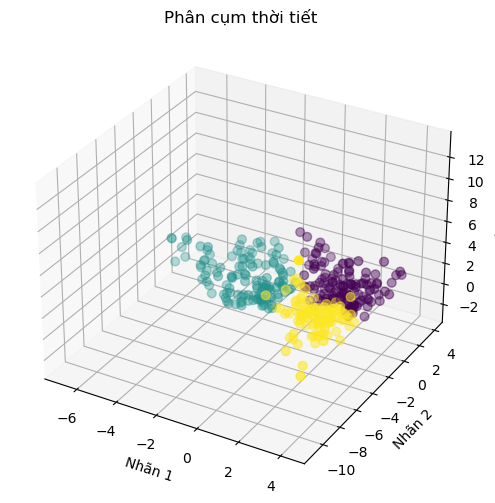

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    dataframe_pca['Nh√£n 1'], 
    dataframe_pca['Nh√£n 2'],
    dataframe_pca['Nh√£n 3'],  c=dataframe_pca['cluster'],  cmap='viridis', s=40)

ax.set_xlabel('Nh√£n 1')
ax.set_ylabel('Nh√£n 2')
ax.set_zlabel('Nh√£n 3')
ax.set_title('Ph√¢n c·ª•m th·ªùi ti·∫øt')
plt.show()


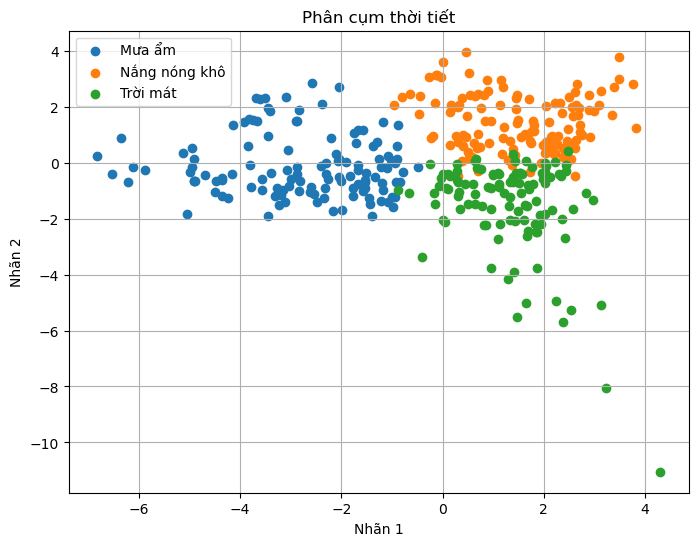

In [ ]:
plt.figure(figsize=(8,6))
for label in dataframe_pca['label'].unique():
    subset = dataframe_pca[dataframe_pca['label'] == label]
    plt.scatter(subset['Nh√£n 1'], subset['Nh√£n 2'], label=label)

plt.xlabel('Nh√£n 1')
plt.ylabel('Nh√£n 2')
plt.legend()
plt.title('Ph√¢n c·ª•m th·ªùi ti·∫øt')
plt.grid(True)
plt.show()


SARIMA

In [18]:
from statsmodels.tsa.arima.model import ARIMA

# Example sales data (monthly)
sales_data = [250, 270, 300, 320, 310, 280, 260, 275, 290, 310, 340, 360]

# Fit ARIMA model
model = ARIMA(sales_data, order=(1,1,1))
model_fit = model.fit()

# Forecast next 6 months
forecast = model_fit.forecast(steps=6)
print(forecast)

[369.93278696 374.41348197 376.43473017 377.34651824 377.7578272
 377.94336929]
